In [1]:
# Import Libraries
import numpy as np 
import pandas as pd
import gensim
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("D:\\data (1).csv")
df.head()

,tweet_id,tweet,sentiment
0,1701,#sxswnui #sxsw #apple defining language of tou...,1
1,1851,Learning ab Google doodles! All doodles should...,1
2,2689,one of the most in-your-face ex. of stealing t...,2
3,4525,This iPhone #SXSW app would b pretty awesome i...,0
4,3604,Line outside the Apple store in Austin waiting...,1


In [3]:
df= df.drop('tweet_id',axis=1)
df.head()

,tweet,sentiment
0,#sxswnui #sxsw #apple defining language of tou...,1
1,Learning ab Google doodles! All doodles should...,1
2,one of the most in-your-face ex. of stealing t...,2
3,This iPhone #SXSW app would b pretty awesome i...,0
4,Line outside the Apple store in Austin waiting...,1


In [4]:
df.shape

(7274, 2)

In [5]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [6]:
df.isna().sum()

tweet        1
sentiment    0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
# create a word cloud 
text= " ".join(cat.split()[1] for cat in df.tweet)
word_cloud= WordCloud(background_color= 'White').generate(text)

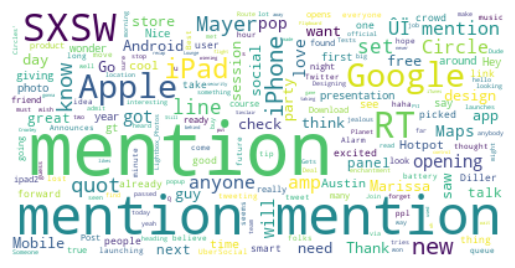

In [9]:
#The plot shows the high number of occurence in text
plt.imshow(word_cloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [10]:
# Download the stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
# Import stopwords and look which type of words are stopwords
from nltk.corpus import stopwords
stop_words= stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

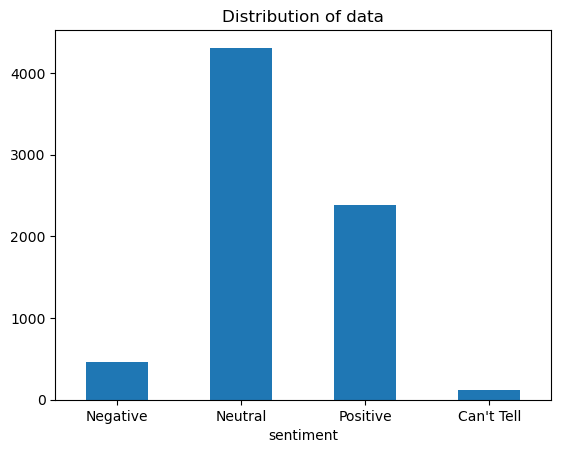

In [12]:
# Plot a graph using the matplotlib library to get the graph to count the sentiment
ax = df.groupby('sentiment').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Neutral','Positive',"Can't Tell"], rotation=0)
# Storing data in lists.
text, sentiment = list(df['tweet']), list(df['sentiment'])

<AxesSubplot:xlabel='sentiment', ylabel='count'>

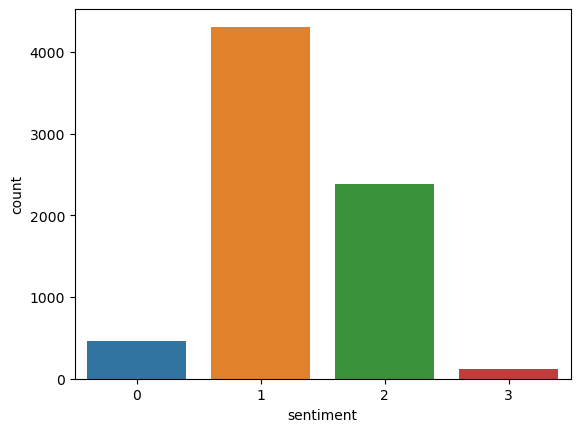

In [13]:
# plot graph using sns 
import seaborn as sns
sns.countplot(x='sentiment', data=df)

In [14]:
# Text convert into lowercase
df['tweet']= df['tweet'].str.lower()
df['tweet'].tail()

7269    @mention google plze tammi.  i'm in middle of ...
7270    rt @mention ÷¼ are you all set? ÷_ {link} ÷...
7271    rt @mention aha! found proof of lactation room...
7272    we just launched our ipad app at #sxsw! get al...
7273    the next fin serv battle is vs apple, goog, mo...
Name: tweet, dtype: object

In [15]:
# Remove stopwords 
StopWords= set(stopwords.words('english'))
def cleaning_stopwords(tweet):
    return " ".join([word for word in str(tweet).split() if word not in StopWords])
df['tweet'] = df['tweet'].apply(lambda tweet: cleaning_stopwords(tweet))
df['tweet'].head()

0    #sxswnui #sxsw #apple defining language touch ...
1    learning ab google doodles! doodles light, fun...
2    one in-your-face ex. stealing show yrs rt @men...
3    iphone #sxsw app would b pretty awesome crash ...
4    line outside apple store austin waiting new ip...
Name: tweet, dtype: object

In [16]:
# Removing punctutuations
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(tweet):
    translator = str.maketrans('', '', punctuations_list)
    return tweet.translate(translator)
df['tweet']= df['tweet'].apply(lambda x: cleaning_punctuations(x))
df['tweet'].tail()

7269    mention google plze tammi im middle sxsw crazi...
7270    rt mention ÷¼ set ÷ link ÷ edchat musedchat...
7271    rt mention aha found proof lactation room excu...
7272    launched ipad app sxsw get details  first edit...
7273    next fin serv battle vs apple goog mobile oper...
Name: tweet, dtype: object

In [17]:
# Cleaning the repeating character

def cleaning_repeating_char(tweet):
    return re.sub(r'(.)1+', r'1', tweet)
df['tweet'] = df['tweet'].apply(lambda x: cleaning_repeating_char(x))
df['tweet'].tail()

7269    mention google plze tammi im middle sxsw crazi...
7270    rt mention ÷¼ set ÷ link ÷ edchat musedchat...
7271    rt mention aha found proof lactation room excu...
7272    launched ipad app sxsw get details  first edit...
7273    next fin serv battle vs apple goog mobile oper...
Name: tweet, dtype: object

In [18]:
# Removing URLs
def cleaning_URLs(df):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',df)
df['tweet'] = df['tweet'].apply(lambda x: cleaning_URLs(x))
df['tweet'].tail()

7269    mention google plze tammi im middle sxsw crazi...
7270    rt mention ÷¼ set ÷ link ÷ edchat musedchat...
7271    rt mention aha found proof lactation room excu...
7272    launched ipad app sxsw get details  first edit...
7273    next fin serv battle vs apple goog mobile oper...
Name: tweet, dtype: object

In [25]:
# Removing numbers and unwanted character , words
def cleaning_numbers(df):
    return re.sub('(([0-9]+)|(+)|(÷+)|(¼+)|(np.float()+)|(#+)|(@+)|(sxsw+)|(rt+)|(ûäü+)|(û goûª+)|(ûªs+)|(«µ+)|(ûï+)|(nui+)|(mention+))','', df)
df['tweet'] = df['tweet'].apply(lambda x: cleaning_numbers(x))
df['tweet'].head()

0      apple defining language touch different dial...
1    learning ab google doodles doodles light funny...
2    one inyourface ex stealing show yrs   quotat  ...
3    iphone  app would b pretty awesome crash every...
4    line outside apple store austin waiting new ip...
Name: tweet, dtype: object

In [20]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

### FInd accuracy using Logistic Regression 

In [22]:
all_data = df[['tweet']]
all_data['tweet'] = all_data['tweet'].str.lower()
cv = CountVectorizer()
vector = cv.fit_transform(all_data['tweet'])
X = vector.toarray()

y= df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

log_reg = LogisticRegression(random_state=42)

log_reg.fit(X_train,y_train)

acc = log_reg.score(X_test,y_test)

print(acc)

C:\Users\hp\AppData\Local\Temp\ipykernel_7188\2877449269.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['tweet'] = all_data['tweet'].str.lower()
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6828597616865261


### Applying SVC

In [23]:
clf= SVC(kernel= 'linear')
clf= clf.fit(X_train,y_train)

acc1 = clf.score(X_test,y_test)

print(acc1)

0.6796516956920257


### Used Tf-Idf vector and find the better accuracy

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = 'english')
vector = tfidf.fit_transform(all_data['tweet'])
X_tfidf = vector.toarray()

X_train, X_test, y_train, y_test = train_test_split(X_tfidf,y,test_size=0.3,random_state=42)
log_reg_tfidf = LogisticRegression(random_state=42)
log_reg_tfidf.fit(X_train,y_train)
acc_tfidf = log_reg_tfidf.score(X_test,y_test)
print(acc_tfidf)

0.689275893675527
